# Linear Regression to Demo Neural Networks and working of back propogation

Epoch [100/1000], Loss: 0.1403
Epoch [200/1000], Loss: 0.0437
Epoch [300/1000], Loss: 0.0346
Epoch [400/1000], Loss: 0.0325
Epoch [500/1000], Loss: 0.0317
Epoch [600/1000], Loss: 0.0314
Epoch [700/1000], Loss: 0.0313
Epoch [800/1000], Loss: 0.0312
Epoch [900/1000], Loss: 0.0312
Epoch [1000/1000], Loss: 0.0312


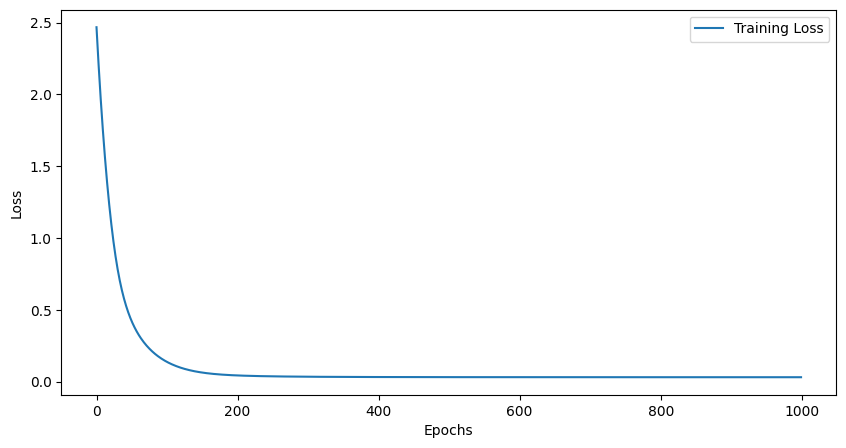

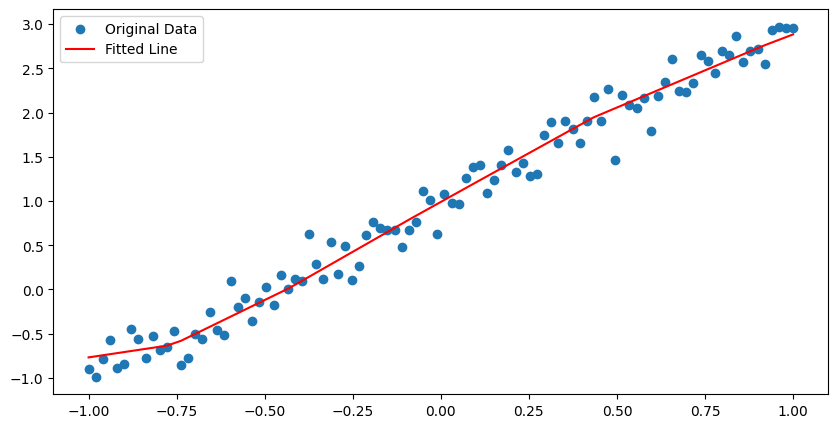

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Create a simple dataset
np.random.seed(42)
x = np.linspace(-1, 1, 100).reshape(-1, 1)
y = 2 * x + 1 + 0.2 * np.random.randn(x.size).reshape(-1, 1)

# Define the model
class SimpleNN(tf.Module):
    def __init__(self):
        self.hidden_layer = tf.keras.layers.Dense(10, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1)

    def __call__(self, x):
        x = self.hidden_layer(x)
        return self.output_layer(x)

# Create the model
model = SimpleNN()

# Loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training loop
num_epochs = 1000
loss_history = []

for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = mean_squared_error(y, y_pred)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    loss_history.append(loss.numpy())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.numpy():.4f}')

# Plot the loss over time
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Original Data')
plt.plot(x, model(x), label='Fitted Line', color='r')
plt.legend()
plt.show()


Let's break down the code step by step to understand its functionality in detail. This code demonstrates how to build and train a simple neural network using TensorFlow to perform a regression task on a synthetic dataset.

### Importing Libraries

```python
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
```
- **TensorFlow** (`tf`): This is a deep learning framework that allows for easy manipulation of tensors and supports automatic differentiation.
- **NumPy** (`np`): A fundamental package for numerical computations in Python, used here for creating and manipulating arrays.
- **Matplotlib** (`plt`): A plotting library used for visualizing data and the results of our model.

### Creating a Simple Dataset

```python
np.random.seed(42)
x = np.linspace(-1, 1, 100).reshape(-1, 1)
y = 2 * x + 1 + 0.2 * np.random.randn(x.size).reshape(-1, 1)
```
- **`np.random.seed(42)`**: Sets the seed for NumPy's random number generator to ensure reproducibility.
- **`np.linspace(-1, 1, 100)`**: Generates 100 evenly spaced values between -1 and 1.
- **`.reshape(-1, 1)`**: Reshapes the generated values into a column vector with 100 rows and 1 column.
- **`2 * x + 1`**: Defines a linear relationship between `x` and `y` with a slope of 2 and an intercept of 1.
- **`0.2 * np.random.randn(x.size).reshape(-1, 1)`**: Adds some Gaussian noise to the data. `np.random.randn(x.size)` generates an array of random numbers from a standard normal distribution with the same size as `x`, and `0.2` scales the noise.

### Defining the Model

```python
class SimpleNN(tf.Module):
    def __init__(self):
        self.hidden_layer = tf.keras.layers.Dense(10, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1)
        
    def __call__(self, x):
        x = self.hidden_layer(x)
        return self.output_layer(x)
```
- **`tf.Module`**: A base class for creating TensorFlow models and layers.
- **`__init__` Method**:
  - **`self.hidden_layer = tf.keras.layers.Dense(10, activation='relu')`**: Defines a dense (fully connected) hidden layer with 10 neurons and ReLU (Rectified Linear Unit) activation function. ReLU activation introduces non-linearity.
  - **`self.output_layer = tf.keras.layers.Dense(1)`**: Defines a dense output layer with 1 neuron and a linear activation function (default for `Dense`).
- **`__call__` Method**:
  - This method allows the class instance to be called like a function. It takes an input `x`, processes it through the hidden layer, and then passes it to the output layer to produce the final output.

### Creating the Model Instance

```python
model = SimpleNN()
```
- Instantiates the `SimpleNN` class, creating a neural network model with the defined architecture.

### Defining the Loss Function

```python
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))
```
- **`mean_squared_error` Function**:
  - **`y_true`**: The true values of the target variable.
  - **`y_pred`**: The predicted values generated by the model.
  - **`tf.square(y_true - y_pred)`**: Computes the square of the difference between the true and predicted values.
  - **`tf.reduce_mean(...)`**: Computes the mean of these squared differences, giving the Mean Squared Error (MSE).

### Defining the Optimizer

```python
optimizer = tf.optimizers.SGD(learning_rate=0.01)
```
- **`tf.optimizers.SGD`**: Defines the optimizer for the model, specifically Stochastic Gradient Descent (SGD).
- **`learning_rate=0.01`**: Sets the learning rate for the optimizer, which controls how much the model's weights are adjusted with respect to the loss gradient.

### Training Loop

```python
num_epochs = 1000
loss_history = []
```
- **`num_epochs = 1000`**: Specifies the number of epochs (iterations over the entire dataset) to train the model.
- **`loss_history = []`**: Initializes an empty list to store the loss values for each epoch.

```python
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = mean_squared_error(y, y_pred)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    loss_history.append(loss.numpy())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.numpy():.4f}')
```
- **`for epoch in range(num_epochs):`**: Iterates over the dataset for the specified number of epochs.
- **`with tf.GradientTape() as tape:`**: Creates a context to record operations for automatic differentiation. `GradientTape` watches all trainable variables inside its context.
- **`y_pred = model(x)`**: Computes the predicted values by passing `x` through the model.
- **`loss = mean_squared_error(y, y_pred)`**: Calculates the loss using the `mean_squared_error` function.
- **`gradients = tape.gradient(loss, model.trainable_variables)`**: Computes the gradients of the loss with respect to the model's trainable variables.
- **`optimizer.apply_gradients(zip(gradients, model.trainable_variables))`**: Applies the computed gradients to update the model's weights.
- **`loss_history.append(loss.numpy())`**: Appends the loss value (converted to a NumPy array) to the `loss_history` list for tracking.
- **`if (epoch + 1) % 100 == 0:`**: Every 100 epochs, prints the current epoch and the corresponding loss value.

### Plotting the Loss Over Time

```python
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
```
- **`plt.figure(figsize=(10, 5))`**: Creates a new figure with specified dimensions.
- **`plt.plot(loss_history, label='Training Loss')`**: Plots the training loss history.
- **`plt.xlabel('Epochs')`**: Labels the x-axis as "Epochs".
- **`plt.ylabel('Loss')`**: Labels the y-axis as "Loss".
- **`plt.legend()`**: Adds a legend to the plot.
- **`plt.show()`**: Displays the plot.

### Plotting the Results

```python
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Original Data')
plt.plot(x, model(x), label='Fitted Line', color='r')
plt.legend()
plt.show()
```
- **`plt.figure(figsize=(10, 5))`**: Creates a new figure for the results plot.
- **`plt.scatter(x, y, label='Original Data')`**: Plots the original data points as a scatter plot.
- **`plt.plot(x, model(x), label='Fitted Line', color='r')`**: Plots the fitted line (model's predictions) in red.
- **`plt.legend()`**: Adds a legend to distinguish between the original data and the fitted line.
- **`plt.show()`**: Displays the plot.

This code illustrates a complete workflow for training a simple neural network using TensorFlow, including data generation, model definition, training, and visualization of results and loss trends.

##Backpropagation Section

The below section is responsible for handling backpropagation is primarily within the training loop where `tf.GradientTape` is used. Backpropagation is a method used to calculate the gradient of the loss function with respect to the model's parameters, which is then used to update the parameters in order to minimize the loss.

### Backpropagation Section

The backpropagation logic is encapsulated within the `tf.GradientTape` context. Here’s the relevant portion of the code:

```python
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = mean_squared_error(y, y_pred)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    loss_history.append(loss.numpy())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.numpy():.4f}')
```

### Detailed Explanation of Backpropagation Steps

1. **Gradient Tape Context**:
    ```python
    with tf.GradientTape() as tape:
    ```
    - **`tf.GradientTape`**: This is a context manager that records operations for automatic differentiation. It essentially "watches" the computation of the loss with respect to the model's parameters.

2. **Forward Pass**:
    ```python
    y_pred = model(x)
    loss = mean_squared_error(y, y_pred)
    ```
    - **`y_pred = model(x)`**: This performs a forward pass where the input `x` is passed through the model to obtain the predicted output `y_pred`.
    - **`loss = mean_squared_error(y, y_pred)`**: The loss is computed using the mean squared error between the true values `y` and the predicted values `y_pred`.

3. **Computing Gradients**:
    ```python
    gradients = tape.gradient(loss, model.trainable_variables)
    ```
    - **`tape.gradient(loss, model.trainable_variables)`**: This computes the gradients of the loss with respect to the model's trainable variables (weights and biases). `tape.gradient` backpropagates the error through the network to compute these gradients.

4. **Applying Gradients**:
    ```python
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    ```
    - **`optimizer.apply_gradients(zip(gradients, model.trainable_variables))`**: This updates the model's parameters by applying the gradients computed in the previous step. The `optimizer` uses these gradients to perform a step in the direction that minimizes the loss function.

### Summary of Backpropagation Process

1. **Forward Pass**: Calculate the predictions and loss.
2. **Gradient Calculation**: Use `tf.GradientTape` to compute the gradients of the loss with respect to the model's parameters.
3. **Parameter Update**: Use the optimizer to update the model’s parameters based on the computed gradients.

### Visualization of Backpropagation Flow

Here's a simplified flow of what happens during backpropagation in the code:

1. **Model Output**: Pass `x` through the model to get `y_pred`.
2. **Loss Computation**: Compute the loss between `y` and `y_pred`.
3. **Gradient Calculation**: Record operations to compute the gradient of the loss with respect to each parameter.
4. **Parameter Update**: Adjust the parameters in the direction that reduces the loss.

The following diagram provides a visual representation of the backpropagation process in the code:

```plaintext
Input (x) -----> Model (Weights) -----> Output (y_pred)
                     |                       |
                     V                       |
              Loss Function (L) <------------|
                     |
                     V
          Gradient Calculation (dL/dW)
                     |
                     V
         Update Weights using Optimizer
```

In this diagram, `dL/dW` represents the gradient of the loss function with respect to the weights, which is used by the optimizer to update the weights and minimize the loss. This process is iteratively applied over multiple epochs to train the model.

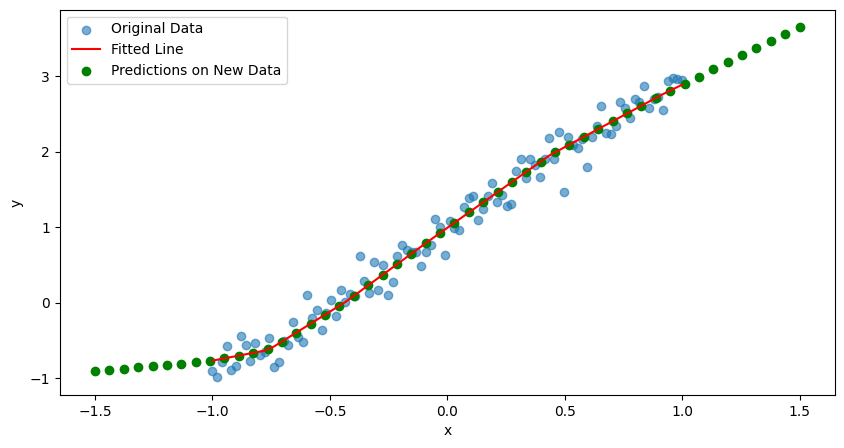

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assuming the model is already trained as shown in the previous code.

# New data for prediction (You can replace this with your own data)
new_x = np.linspace(-1.5, 1.5, 50).reshape(-1, 1)

# Predict using the trained model
predictions = model(new_x)

# Plotting the original data, the model fit line, and the new predictions
plt.figure(figsize=(10, 5))

# Original training data
plt.scatter(x, y, label='Original Data', alpha=0.6)

# Model's fitted line on the training data
plt.plot(x, model(x), label='Fitted Line', color='r')

# New predictions
plt.scatter(new_x, predictions, label='Predictions on New Data', color='g')

# Adding labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


To use the trained model for making predictions, you need to follow a few steps:

1. **Prepare the Input Data**: Ensure that the input data is in the same format as the data used for training.
2. **Use the Model to Predict**: Pass the input data through the trained model to get predictions.
3. **Evaluate the Predictions**: Optionally, compare the predictions to actual values if available.

Here's the code to make predictions using the model defined and trained in the above example:

### Prediction Code

```python
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assuming the model is already trained as shown in the previous code.

# New data for prediction (You can replace this with your own data)
new_x = np.linspace(-1.5, 1.5, 50).reshape(-1, 1)

# Predict using the trained model
predictions = model(new_x)

# Plotting the original data, the model fit line, and the new predictions
plt.figure(figsize=(10, 5))

# Original training data
plt.scatter(x, y, label='Original Data', alpha=0.6)

# Model's fitted line on the training data
plt.plot(x, model(x), label='Fitted Line', color='r')

# New predictions
plt.scatter(new_x, predictions, label='Predictions on New Data', color='g')

# Adding labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
```

### Explanation

1. **Import Libraries**:
   ```python
   import tensorflow as tf
   import numpy as np
   import matplotlib.pyplot as plt
   ```
   - Ensure that TensorFlow, NumPy, and Matplotlib are imported.

2. **Assume Model is Trained**:
   - The model is already trained as per the previous code, so you don't need to retrain it. This code assumes the model `SimpleNN` and the variable `model` have already been defined and trained.

3. **Prepare New Data for Prediction**:
   ```python
   new_x = np.linspace(-1.5, 1.5, 50).reshape(-1, 1)
   ```
   - Generate new data points (`new_x`) in the range `-1.5` to `1.5` with 50 samples. You can replace this with your own data that you want to predict on.

4. **Make Predictions**:
   ```python
   predictions = model(new_x)
   ```
   - Pass the new data `new_x` through the trained model to get the predictions.

5. **Plot the Results**:
   ```python
   plt.figure(figsize=(10, 5))

   plt.scatter(x, y, label='Original Data', alpha=0.6)
   plt.plot(x, model(x), label='Fitted Line', color='r')
   plt.scatter(new_x, predictions, label='Predictions on New Data', color='g')

   plt.xlabel('x')
   plt.ylabel('y')
   plt.legend()
   plt.show()
   ```
   - Create a figure for plotting.
   - Plot the original training data (`x` and `y`) as scatter points.
   - Plot the fitted line obtained from the model on the training data.
   - Plot the new predictions on the new data points.

### Notes

- **`new_x`**: This is the new input data for which predictions are needed. Ensure that this data is in the same scale and format as the training data.
- **Predictions**: The output `predictions` is a TensorFlow tensor containing the predicted values for the new data points.
- **Visualization**: The plot visualizes the original data, the fitted line (model predictions on the training data), and the new predictions.

This code will allow you to visually compare the model’s predictions on new input data with the original dataset and the fitted model.